In [1]:
import numpy as np
import pandas as pd 

In [2]:
df = pd.read_csv(r"C:\Users\mohni\Downloads\air-quality-india.csv\air-quality-india.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36192 entries, 0 to 36191
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Timestamp  36192 non-null  object 
 1   Year       36192 non-null  int64  
 2   Month      36192 non-null  int64  
 3   Day        36192 non-null  int64  
 4   Hour       36192 non-null  int64  
 5   PM2.5      36192 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 1.7+ MB


In [4]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Date'] = df['Timestamp'].dt.date

In [5]:
df = df.drop(['Timestamp'] , axis= 1)

In [6]:
df.head()

,Year,Month,Day,Hour,PM2.5,Date
0,2017,11,7,12,64.51,2017-11-07
1,2017,11,7,13,69.95,2017-11-07
2,2017,11,7,14,92.79,2017-11-07
3,2017,11,7,15,109.66,2017-11-07
4,2017,11,7,16,116.50,2017-11-07


In [7]:
averaged_values = df.groupby('Date')['PM2.5'].mean().reset_index()


In [8]:
averaged_values.head(20)

,Date,PM2.5
0,2017-11-07,99.805833
1,2017-11-08,110.979565
2,2017-11-09,114.915833
3,2017-11-10,119.404091
4,2017-11-11,109.267273
5,2017-11-12,120.354000
6,2017-11-13,117.146667
7,2017-11-14,89.475000
8,2017-11-15,78.730588
9,2017-11-16,74.196250


In [9]:
Q1 = averaged_values['PM2.5'].quantile(0.25)
Q3 = averaged_values['PM2.5'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers based on the bounds
filtered_df = averaged_values[(averaged_values['PM2.5'] >= lower_bound) & (averaged_values['PM2.5'] <= upper_bound)]

# Print the filtered DataFrame
print(filtered_df)

            Date       PM2.5
0     2017-11-07   99.805833
1     2017-11-08  110.979565
2     2017-11-09  114.915833
3     2017-11-10  119.404091
4     2017-11-11  109.267273
...          ...         ...
1611  2022-05-31   41.465417
1612  2022-06-01   41.645833
1613  2022-06-02   42.255417
1614  2022-06-03   39.425417
1615  2022-06-04   38.503750

[1616 rows x 2 columns]


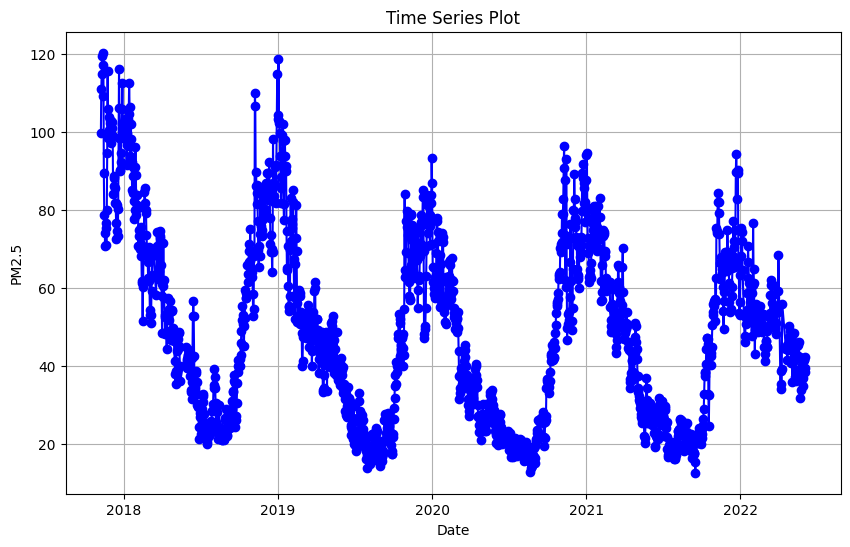

In [10]:
import matplotlib.pyplot as plt

# Assuming Date_series_data is your DataFrame with 'time' and 'target_variable' columns
# Assuming time_series_data['time'] is in datetime format

# Plotting the time series
plt.figure(figsize=(10, 6))
plt.plot(averaged_values['Date'], averaged_values['PM2.5'], color='blue', marker='o', linestyle='-')
plt.title('Time Series Plot')
plt.xlabel('Date')
plt.ylabel('PM2.5')
plt.grid(True)
plt.show()


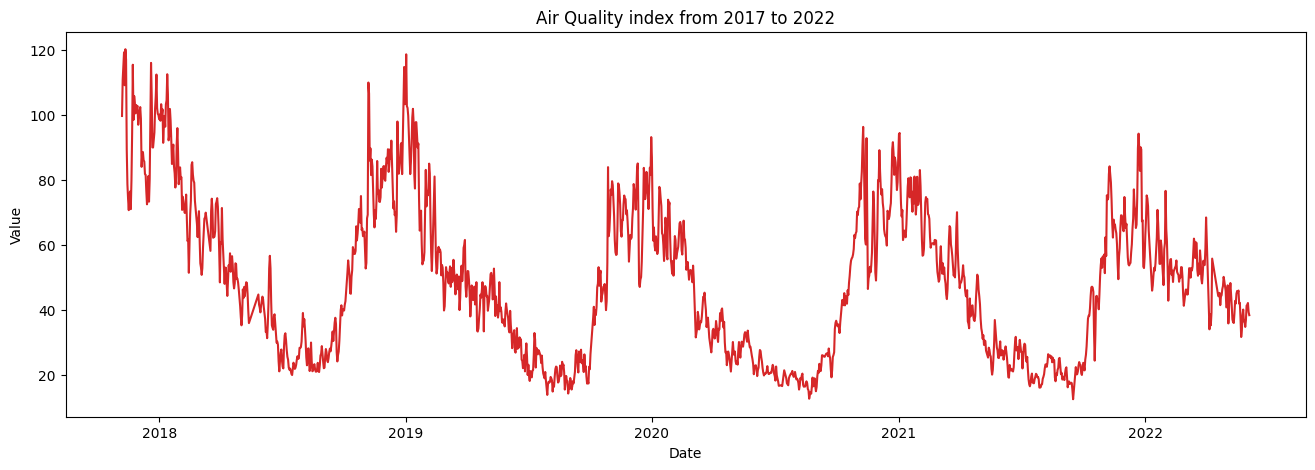

In [11]:

# Draw Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(averaged_values, x=averaged_values['Date'], y=averaged_values['PM2.5'], title='Air Quality index from 2017 to 2022')    

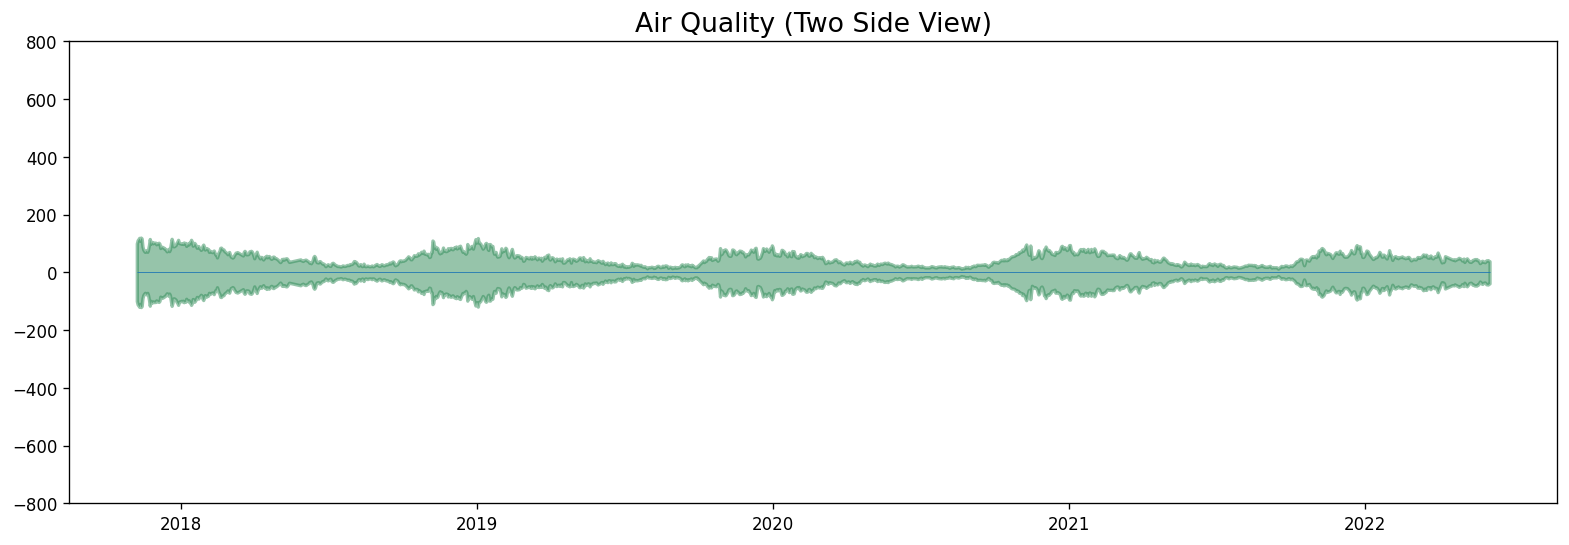

In [12]:
# Plot
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(averaged_values['Date'], y1=averaged_values['PM2.5'], y2=-averaged_values['PM2.5'], alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-800, 800)
plt.title('Air Quality (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(averaged_values['Date']), xmax=np.max(averaged_values['Date']), linewidth=.5)
plt.show()

In [13]:
averaged_values.reset_index(inplace=True)
averaged_values.set_index('Date', inplace=True)

In [14]:
averaged_values.head()

,index,PM2.5
Date,,
2017-11-07,0,99.805833
2017-11-08,1,110.979565
2017-11-09,2,114.915833
2017-11-10,3,119.404091
2017-11-11,4,109.267273


In [15]:
averaged_values.drop(columns=['index'], inplace=True)

print(averaged_values.columns)

Index(['PM2.5'], dtype='object')


In [16]:
df = averaged_values
df['value'] = df['PM2.5']

In [17]:
df.drop(['PM2.5'] , axis=1)

,value
Date,
2017-11-07,99.805833
2017-11-08,110.979565
2017-11-09,114.915833
2017-11-10,119.404091
2017-11-11,109.267273
...,...
2022-05-31,41.465417
2022-06-01,41.645833
2022-06-02,42.255417


In [18]:
df.to_csv('Air_quality.csv', index=False)
